# Now we'll take the sequence number 30 which has specific inlet propellant pressure of 20 BAR and train a condition monitoring model

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Input
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
df=pd.read_csv('data/SN01_20_30.csv')
df.head()

,Unnamed: 0,ton,thrust,mfr
0,2021-03-04 09:16:00.000,0.0,-0.001365,0.0
1,2021-03-04 09:16:00.010,0.0,0.002536,0.0
2,2021-03-04 09:16:00.020,0.0,0.000726,0.0
3,2021-03-04 09:16:00.030,0.0,-0.006169,0.0
4,2021-03-04 09:16:00.040,0.0,0.001169,0.0


In [43]:
df[['thrust','mfr']].corr().style.background_gradient(cmap='coolwarm')

,thrust,mfr
thrust,1.000000,0.959416
mfr,0.959416,1.000000


In [44]:
df[df['ton']==0][['thrust','mfr']].corr().style.background_gradient(cmap='coolwarm')

,thrust,mfr
thrust,1.000000,0.973107
mfr,0.973107,1.000000


In [45]:
df[df['ton']==1][['thrust','mfr']].corr().style.background_gradient()

,thrust,mfr
thrust,1.000000,0.917851
mfr,0.917851,1.000000


In [3]:
df_thrust_ts = df.loc[:, ["Unnamed: 0","thrust"]]
df_thrust_ts.index = df_thrust_ts["Unnamed: 0"]
ts = df_thrust_ts.drop("Unnamed: 0",axis=1)

In [4]:
df.columns

Index(['Unnamed: 0', 'ton', 'thrust', 'mfr'], dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Unnamed: 0'])

In [8]:
train, test = df.loc[df['Date'] <= '2021-03-04 10:15:00.000'], df.loc[df['Date'] > '2021-03-04 10:15:00.010']

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(train[['thrust', 'mfr']])

train[['thrust', 'mfr']] = scaler.transform(train[['thrust', 'mfr']])
test[['thrust', 'mfr']] = scaler.transform(test[['thrust', 'mfr']])

D:\IDE\anaconda3\envs\RL1\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\IDE\anaconda3\envs\RL1\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
train.columns

Index(['Unnamed: 0', 'ton', 'thrust', 'mfr', 'Date'], dtype='object')

In [15]:
train.drop(['Unnamed: 0', 'ton'], axis=1, inplace=True)
train.head()

D:\IDE\anaconda3\envs\RL1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,thrust,mfr,Date
0,-1.041626,-1.088146,2021-03-04 09:16:00.000
1,-1.027592,-1.088146,2021-03-04 09:16:00.010
2,-1.034102,-1.088146,2021-03-04 09:16:00.020
3,-1.058906,-1.088146,2021-03-04 09:16:00.030
4,-1.032509,-1.088146,2021-03-04 09:16:00.040


In [18]:
seq_size = 70  # you can increase the seq_size to get better result


def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):

        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['thrust', 'mfr']], train[['thrust', 'mfr']], seq_size)
testX, testY = to_sequences(test[['thrust', 'mfr']], test[['thrust', 'mfr']], seq_size)


In [ ]:
model.save('model_file/lstm_AE.h5')

In [22]:
model = tf.keras.models.load_model('lstm_AE.h5')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 64)                17152     
                                                                 
 repeat_vector_12 (RepeatVec  (None, 70, 64)           0         
 tor)                                                            
                                                                 
 lstm_33 (LSTM)              (None, 70, 64)            33024     
                                                                 
 time_distributed_12 (TimeDi  (None, 70, 2)            130       
 stributed)                                                      
                                                                 
Total params: 50,306
Trainable params: 50,306
Non-trainable params: 0
_________________________________________________________________


(array([[6.25000e+03, 8.48510e+04, 3.00070e+04, 2.18080e+04, 1.73260e+04,
         1.42440e+04, 1.25230e+04, 1.15330e+04, 1.10100e+04, 1.11490e+04,
         1.19630e+04, 1.36100e+04, 1.39540e+04, 1.43190e+04, 1.45510e+04,
         1.45080e+04, 1.27240e+04, 1.02870e+04, 8.41100e+03, 6.80800e+03,
         4.87900e+03, 3.17600e+03, 1.92500e+03, 1.05400e+03, 4.84000e+02,
         2.73000e+02, 1.61000e+02, 9.70000e+01, 4.10000e+01, 5.00000e+00],
        [1.39802e+05, 1.57653e+05, 4.72160e+04, 7.34400e+03, 1.40200e+03,
         3.58000e+02, 7.90000e+01, 2.20000e+01, 1.80000e+01, 1.60000e+01,
         1.00000e+01, 1.00000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]),
 array([0.00154852, 0.01090486, 0.0202612 , 0.02961754, 0.03897388,
        0.04833022, 0.05768656, 0.067042

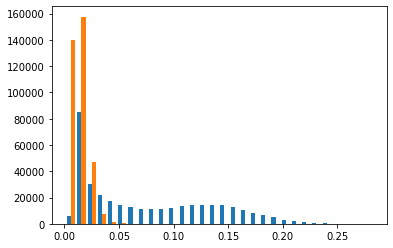

In [24]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)

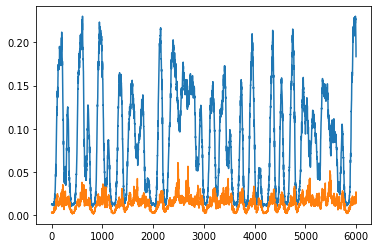

In [25]:
plt.plot(trainMAE[:6000])

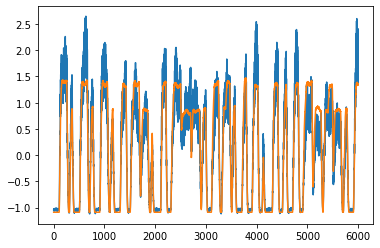

In [26]:
plt.plot(train[['thrust', 'mfr']][:6000])

In [27]:
train.head(2)

,thrust,mfr,Date
0,-1.041626,-1.088146,2021-03-04 09:16:00.000
1,-1.027592,-1.088146,2021-03-04 09:16:00.010


#### Let's predict the test values and see the anomalies according toour model

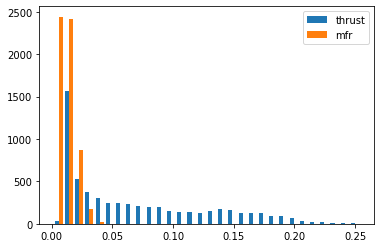

In [28]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)
plt.legend(['thrust', 'mfr'])

#### ill be taking the least values as threshold for thrust and mfr

In [29]:
test_thrust = []
for i in range(len(testMAE)):
    test_thrust.append(testMAE[i][0])

In [30]:
test_mfr = []
for i in range(len(testMAE)):
    test_mfr.append(testMAE[i][1])

In [31]:

anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['test_thrust'] = test_thrust
anomaly_df['test_mfr'] = test_mfr

max_thrust = 0.22
max_mfr = 0.034

anomaly_df['max_thrust'] = max_thrust
anomaly_df['max_mfr'] = max_mfr

anomaly_df['anomaly_thrust'] = anomaly_df['test_thrust'] > anomaly_df['max_thrust']
anomaly_df['anomaly_mfr'] = anomaly_df['test_mfr'] > anomaly_df['max_mfr']

anomaly_df['thrust'] = test[seq_size:]['thrust']
anomaly_df['mfr'] = test[seq_size:]['mfr']

In [32]:
anomaly_df.head(3)

,Unnamed: 0,ton,thrust,mfr,Date,test_thrust,test_mfr,max_thrust,max_mfr,anomaly_thrust,anomaly_mfr
354072,2021-03-04 10:15:00.720,0.0,-1.053175,-1.088146,2021-03-04 10:15:00.720,0.093812,0.022153,0.22,0.034,False,False
354073,2021-03-04 10:15:00.730,0.0,-1.083559,-1.088146,2021-03-04 10:15:00.730,0.086189,0.013598,0.22,0.034,False,False
354074,2021-03-04 10:15:00.740,0.0,-1.076147,-1.088146,2021-03-04 10:15:00.740,0.088057,0.014411,0.22,0.034,False,False


### Filteriing out the anomalies in dataframe

In [33]:
anomaly_thrust = anomaly_df.loc[anomaly_df['anomaly_thrust'] == True]
anomaly_thrust.head(2)

,Unnamed: 0,ton,thrust,mfr,Date,test_thrust,test_mfr,max_thrust,max_mfr,anomaly_thrust,anomaly_mfr
354814,2021-03-04 10:15:08.140,0.0,2.497647,1.220443,2021-03-04 10:15:08.140,0.223228,0.031436,0.22,0.034,True,False
354827,2021-03-04 10:15:08.270,0.0,0.333077,-0.103152,2021-03-04 10:15:08.270,0.224143,0.031466,0.22,0.034,True,False


In [34]:
anomaly_mfr = anomaly_df.loc[anomaly_df['anomaly_mfr'] == True]
anomaly_mfr.head(2)

,Unnamed: 0,ton,thrust,mfr,Date,test_thrust,test_mfr,max_thrust,max_mfr,anomaly_thrust,anomaly_mfr
354284,2021-03-04 10:15:02.840,0.0,-0.795436,-0.822386,2021-03-04 10:15:02.840,0.158043,0.035342,0.22,0.034,False,True
354820,2021-03-04 10:15:08.200,0.0,1.777942,0.633019,2021-03-04 10:15:08.200,0.204911,0.040821,0.22,0.034,False,True


In [35]:
anomaly_mfr.shape , anomaly_df.shape, anomaly_thrust.shape

((30, 11), (5928, 11), (49, 11))

In [36]:
# As we standardized the values now we're inversing it
anomaly_df_scaler = scaler.inverse_transform(anomaly_df[['test_thrust', 'test_mfr']])

In [37]:
anomaly_df_scaler_thrust = []
for i in range(len(anomaly_df_scaler)):
    anomaly_df_scaler_thrust.append(anomaly_df_scaler[i][0])
    
anomaly_df_scaler_mfr = []
for i in range(len(anomaly_df_scaler)):
    anomaly_df_scaler_mfr.append(anomaly_df_scaler[i][1])

In [38]:
anomaly_mfr_scaler = scaler.inverse_transform(anomaly_mfr[['test_thrust', 'test_mfr']])
anomaly_mfr_scaler

array([[  0.33211917, 147.35850791],
       [  0.34514748, 148.0770401 ],
       [  0.34539365, 148.08942079],
       [  0.34609891, 147.3607036 ],
       [  0.34598425, 147.59817594],
       [  0.34165266, 147.4250484 ],
       [  0.33976507, 147.23887327],
       [  0.32839567, 147.21430387],
       [  0.32931578, 147.25214502],
       [  0.30766728, 148.05832696],
       [  0.30945235, 147.60391058],
       [  0.30824045, 147.60140636],
       [  0.34428276, 147.41010028],
       [  0.31828072, 147.33711295],
       [  0.30266992, 147.71403865],
       [  0.30208746, 147.65872501],
       [  0.30368673, 148.05369383],
       [  0.30239824, 147.67824785],
       [  0.31409094, 147.97595473],
       [  0.31269049, 147.93531311],
       [  0.31466705, 149.37025368],
       [  0.31261765, 147.96840648],
       [  0.31290179, 148.24478837],
       [  0.31209872, 148.71336256],
       [  0.31197865, 147.38167457],
       [  0.31248768, 148.15231935],
       [  0.30973634, 148.04383858],
 

In [39]:
anomaly_mfr_scaler_thrust = []
for i in range(len(anomaly_mfr_scaler)):
    anomaly_mfr_scaler_thrust.append(anomaly_mfr_scaler[i][0])
    
anomaly_mfr_scaler_mfr = []
for i in range(len(anomaly_mfr_scaler)):
    anomaly_mfr_scaler_mfr.append(anomaly_mfr_scaler[i][1])

# Plotting the anomalies

<AxesSubplot:xlabel='Date'>

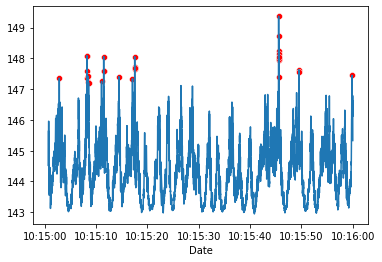

In [40]:
sns.lineplot(x=anomaly_df['Date'],y= anomaly_df_scaler_mfr)
sns.scatterplot(x=anomaly_mfr['Date'], y=anomaly_mfr_scaler_mfr, color='r')

<AxesSubplot:xlabel='Date'>

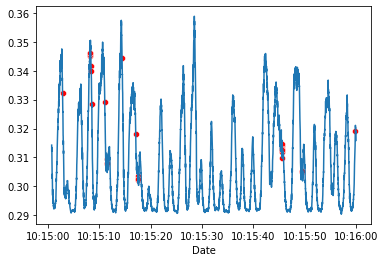

In [41]:
sns.lineplot(x=anomaly_df['Date'],y= anomaly_df_scaler_thrust)
sns.scatterplot(x=anomaly_mfr['Date'], y=anomaly_mfr_scaler_thrust, color='r')